# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [149]:
# Import numpy and pandas

import numpy as np
import pandas as pd

from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tools.eval_measures import rmse

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [11]:
# Your code here:

sensor

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299
...,...,...,...,...,...,...,...,...,...,...,...,...
1746,1.797120,-0.562324,2.445889,0.824443,0.533154,0.189844,-0.123211,0.909536,-0.379757,-0.268367,0.006733,-0.064874
1747,1.814297,-0.569719,2.449655,0.817212,0.539396,0.203020,-0.057641,0.723118,-0.437812,-0.102444,-0.060666,-0.229738
1748,1.830821,-0.578367,2.447967,0.809207,0.546658,0.215288,0.343238,0.997236,-0.338155,-0.085590,-0.030209,-0.087740
1749,1.849557,-0.586962,2.439458,0.800485,0.553834,0.229110,0.470144,1.227937,-0.332223,-0.048105,0.029555,0.060441


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [6]:
# Your code here:

sensor.isnull().sum()

attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

In [7]:
sensor.isna().sum()

attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [12]:
# Your code here:

sensor.shape

(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [31]:
# Your code here:

sensor['time'] = pd.date_range(
    start = '1/1/2018 00:00:00', 
    end = '1/1/2018 00:29:10',
    periods = 1751)

In [32]:
sensor = sensor[['time', 'attitude.roll', 'attitude.pitch', 'attitude.yaw', 'gravity.x', 'gravity.y', 'gravity.z', 'rotationRate.x', 'rotationRate.y', 'rotationRate.z', 'userAcceleration.x', 'userAcceleration.y', 'userAcceleration.z']]

Assign the time series index to the dataframe's index.

In [132]:
# Your code here:

sensor = sensor.set_index('time')

Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

In [56]:
# Your code here:

userAcceleration_x_decompose = seasonal_decompose(sensor['userAcceleration.x'], model="additive", period=60)

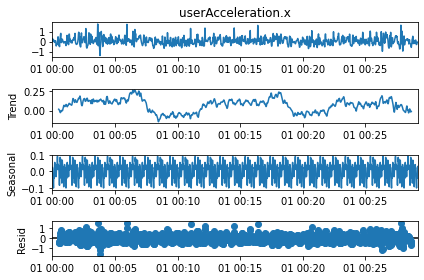

In [57]:
userAcceleration_x_decompose.plot();

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

In [58]:
rotationRate_x_decompose = seasonal_decompose(sensor['rotationRate.x'], model="additive", period=60)

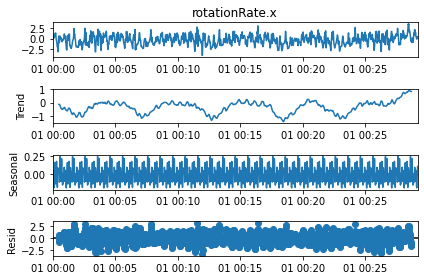

In [59]:
rotationRate_x_decompose.plot();

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

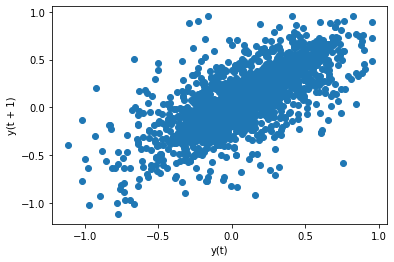

In [85]:
# Your code here:

pd.plotting.lag_plot(sensor['userAcceleration.z'])

Create a lag plot for `rotationRate.x`

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

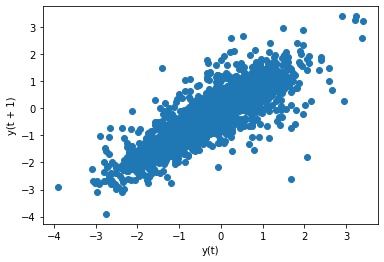

In [69]:
# Your code here:

pd.plotting.lag_plot(sensor['rotationRate.x'])

What are your conclusions from both visualizations?

In [87]:
# Your conclusions here:

# For both graphs on the x-axis we can see the different values that takes the 
# variable userAcceleration.z and otationRate.x for a time t, on the y-axis the 
# different values of the same variable but for a time out of phase 
# (previous t). 
# Both variables have a positive correlation, but the first one is more dispersed
# along the diagonal, suggesting that it has a weaker relationship while the second 
# one has more tight points and can have a stronger relationship.

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [92]:
# Your code here:

userAcceleration_x_adfuller = adfuller(sensor['userAcceleration.x'])
print('ADF Statistic: %f' % userAcceleration_x_adfuller[0])
print('p-value: %f' % userAcceleration_x_adfuller[1])
print('Critical Values:')
for key, value in userAcceleration_x_adfuller[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -17.957994
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [93]:
rotationRate_x_adfuller = adfuller(sensor['rotationRate.x'])
print('ADF Statistic: %f' % rotationRate_x_adfuller[0])
print('p-value: %f' % rotationRate_x_adfuller[1])
print('Critical Values:')
for key, value in rotationRate_x_adfuller[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.269861
p-value: 0.000006
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


What are your conclusions from this test?

In [13]:
# Your conclusions here:

# P-value for both variables are less than 0.05 so we can reject the null hypothesis
# of this test: the data does not have a unit root and is stationary.

Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [143]:
userAcceleration_x_ARIMA = ARIMA(sensor['userAcceleration.x'].tail(10), order=(2,1,0)).fit()
userAcceleration_x_ARIMA.params

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ar.L1     0.465961
ar.L2     0.056778
sigma2    0.008446
dtype: float64

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [172]:
# Your code here:

userAcceleration_x_ARIMA_predictions = userAcceleration_x_ARIMA.predict(star='2018-01-01 00:29:01', end='2018-01-01 00:29:10')
userAcceleration_x_ARIMA_predictions

2018-01-01 00:29:01    0.000000
2018-01-01 00:29:02    0.149749
2018-01-01 00:29:03   -0.016516
2018-01-01 00:29:04   -0.272244
2018-01-01 00:29:05   -0.373278
2018-01-01 00:29:06   -0.263557
2018-01-01 00:29:07   -0.265811
2018-01-01 00:29:08   -0.025028
2018-01-01 00:29:09   -0.068316
2018-01-01 00:29:10   -0.029682
Freq: S, Name: predicted_mean, dtype: float64

In [173]:
rmse(sensor['userAcceleration.x'].tail(10), userAcceleration_x_ARIMA_predictions)

0.10078281320620121